# Importing Libraries & Assigning Aliases

In [46]:
#Data Processing
import pandas as pd
import numpy as np

#Data Visulaisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("dark_background")

# Loading Input Dataset

In [47]:
data= pd.read_csv('startup_funding.csv')
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [48]:
# Checking Data Attributes

In [49]:
data.shape

(3044, 10)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [51]:
#checking for null values
null_check=data.isnull().sum().reset_index()
null_check.columns=['Columns','Number of Nulls']
null_check['% Of Nulls']=((null_check['Number of Nulls']/len(data))*100).round(2)
null_check

,Columns,Number of Nulls,% Of Nulls
0,Sr No,0,0.00
1,Date dd/mm/yyyy,0,0.00
2,Startup Name,0,0.00
3,Industry Vertical,171,5.62
4,SubVertical,936,30.75
5,City Location,180,5.91
6,Investors Name,24,0.79
7,InvestmentnType,4,0.13
8,Amount in USD,960,31.54
9,Remarks,2625,86.24


In [52]:
# 86% of the values in Remarks columns are null.Dropping the columns that are not required

In [53]:
data.drop(['Sr No','Remarks'],axis=1,inplace=True)

In [54]:
data.columns

Index(['Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD'],
      dtype='object')

In [55]:
data['Startup Name']=data['Startup Name'].str.replace('0','')
data['Industry Vertical']=data['Industry Vertical'].str.replace('0','')
data['City  Location']=data['City  Location'].str.replace('0','')
data['Investors Name']=data['Investors Name'].str.replace('0','')
#data['Startup Name', 'Industry Vertical','City  Location', 'Investors Name']].str.replace('0','')

In [56]:
# Filling the data with mode and mean values

In [57]:
data['SubVertical'].fillna(data['SubVertical'].mode()[0],inplace=True)

In [58]:
#Converting 'Amount in USD' to integer

In [59]:
data["Amount in USD"]=data["Amount in USD"].str.replace(",","")
data["Amount in USD"]=data["Amount in USD"].str.replace("undisclosed","")
data["Amount in USD"]=data["Amount in USD"].str.replace("Undisclosed","")
data["Amount in USD"]=data["Amount in USD"].str.replace("0N/A","")
data["Amount in USD"]=data["Amount in USD"].str.replace("unknown","")
data["Amount in USD"]=data["Amount in USD"].str.replace("+","")

In [60]:
data["Amount in USD"]=pd.to_numeric(data["Amount in USD"])

In [61]:
data['Amount in USD'].fillna(data['Amount in USD'].mean(),inplace=True)

In [62]:
#Converting date to datetime and extracting month and year values

In [63]:
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("05/072018","05/07/2018")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("01/07/015","01/07/2015")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("010/7/2015","01/07/2015")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("12/05.2015","12/05/2015")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("13/04.2015","13/04/2015")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("15/01.2015","15/01/2015")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("22/01//2015","22/01/2015")

In [64]:
data['Date dd/mm/yyyy']=pd.to_datetime(data['Date dd/mm/yyyy'])

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
567,2017-10-27,OfBusiness,Technology,B2B Finance & Fulfilment Network,Gurgaon,Kotak Mahindra Bank,Debt Funding,3.800000e+06
1454,2016-08-17,Appknox,Technology,Mobile security solutions,Bengaluru,"SeedPlus, Infocomm Investments, Accel Partners...",Private Equity,6.750000e+05
1077,2017-01-18,Kratikal,Technology,Cyber Security Solution provider,New Delhi,"Amajit Gupta, Praveen Dubey, J.P. Bhatt",Seed Funding,1.840034e+07
1802,2016-04-22,Druva,Technology,Converged Backup & Data Protection Solutions f...,Pune,"NTT Finance, Telephone Corporation",Private Equity,1.840034e+07
2074,2016-01-21,Easypolicy,Consumer Internet,Online insurance policy aggregator,Noida,Unilazer Ventures,Private Equity,2.200000e+06
...,...,...,...,...,...,...,...,...
701,2017-07-18,Ideal Insurance,Consumer Internet,Online Insurance platform,Kolkata,Xelpmoc,Seed Funding,1.840034e+07
2137,2015-09-12,Voxweb,Picture creation & Social mobile app,Online Lending Platform,Mumbai,Undisclosed Investor,Seed Funding,3.500000e+05
1155,2016-12-15,Amagi Media Labs,Technology,Media Technology Solutions,Mumbai,"Emerald Media, Premji Invest",Private Equity,3.500000e+07
950,2017-08-03,Supr Daily,Consumer Internet,Subscription based Home Delivery Platform,Mumbai,Y Combinator,Seed Funding,1.200000e+05


In [65]:
data['Year']=data['Date dd/mm/yyyy'].dt.year
data['Month']=data['Date dd/mm/yyyy'].dt.month

[Text(0.5, 1.0, 'Distribution of null values in the data')]

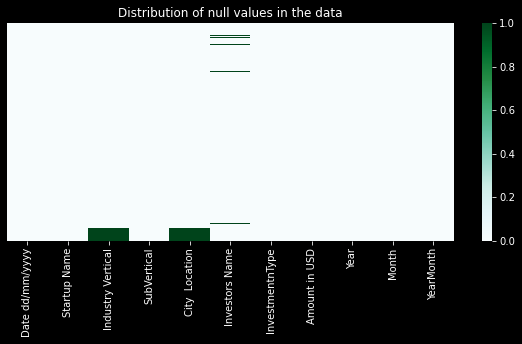

In [130]:
plt.figure(figsize=(10,4))
g1=sns.heatmap(data=data.isnull(),yticklabels=False,cmap='BuGn')
g1.set(title="Distribution of null values in the data")

In [67]:
#Who are the Top 10 investors in Indian ecossystem?

In [68]:
Top_investors=pd.DataFrame(data.groupby(['Investors Name']).sum()["Amount in USD"]).sort_values(by="Amount in USD",ascending=False)

,Amount in USD
Investors Name,
Westbridge Capital,3.900000e+09
Softbank,2.500000e+09
SoftBank Group,1.462000e+09
"Microsoft, eBay, Tencent Holdings",1.400000e+09
Vijay Shekhar Sharma,1.036951e+09
Steadview Capital and existing investors,7.000000e+08
"Alibaba Group, Ant Financial",6.800000e+08
"Altimeter Capital, DST Global",5.850000e+08
SoftBank Vision Fund,5.310000e+08


[Text(0.5, 1.0, 'Top 10 Ivestors by amount Invested')]

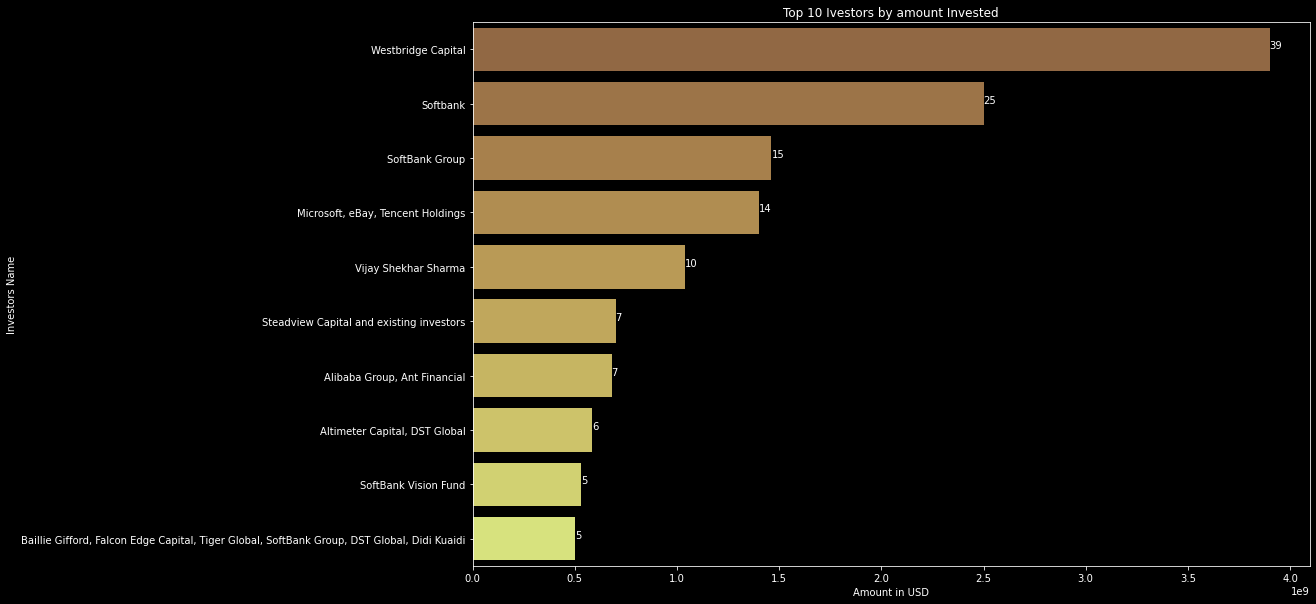

In [126]:
plt.figure(figsize=(15,10))
color1=['#9E6737','#AA743A','#B6823D','#C09141','#C9A046','#D1AF4B','#D7C051','#DDD059','#E1E162','#E4F26E']
sns.set_palette(sns.color_palette(color1))
g2=sns.barplot(data=(Top_investors[0:10]).reset_index(),x="Amount in USD",y='Investors Name')
for a in g2.patches:
    g2.annotate('{:.0f}'.format((a.get_width()/100000000).round(2)),
              ((a.get_width(),a.get_y()+a.get_height()/2)),
               ha="left", va="top",
               xytext=(0,9),
               textcoords="offset points")
    
g2.set(title="Top 10 Ivestors by amount Invested")

In [70]:
#In which city are the highest number of startups located

In [71]:
data_cities=data.dropna(how="any",axis=0,subset=['City  Location'])
data_cities.shape

(2864, 10)

In [72]:
data_cities_sum=pd.DataFrame(data_cities.groupby(['City  Location']).sum()["Amount in USD"])
data_cities_sum['% Investements']=((data_cities_sum['Amount in USD']/data_cities_sum['Amount in USD'].sum())*100).round(2)
data_cities_sum=data_cities_sum.reset_index().sort_values(by='% Investements',ascending=False)

,City Location,Amount in USD,% Investements
7,Bengaluru,2.323800e+10,43.10
60,Mumbai,7.994992e+09,14.83
67,New Delhi,6.358879e+09,11.80
32,Gurgaon,4.685413e+09,8.69
74,Noida,1.963677e+09,3.64
...,...,...,...
46,Jodhpur,1.600000e+05,0.00
50,Kerala,2.700000e+04,0.00
63,Mumbai / UK,4.000000e+04,0.00
62,Mumbai / NY,2.000000e+05,0.00


In [73]:
Top_10 = data_cities_sum[['City  Location','% Investements']][0:10]
Top_10.loc[len(Top_10.index)] = ['Others', 100-(data_cities_sum['% Investements'][0:10]).sum()] 
Top_10=Top_10.sort_values(by='% Investements',ascending=False)

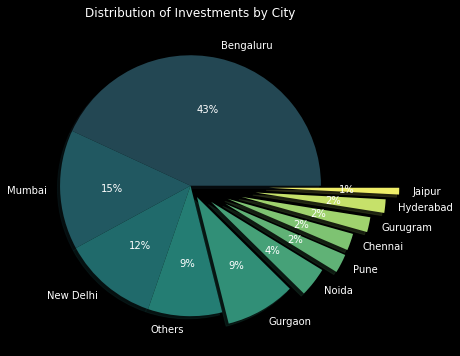

In [121]:
plt.figure(figsize=(6,6))
plt.title("Distribution of Investments by City")
colors1 = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80','#4EF4D1']
colors=['#234753','#215861','#206A6B','#247D73','#318F77','#46A178','#60B276','#7EC372','#A0D36E','#C6E16A','#EFEE69']
plt.axis("equal")
g3=plt.pie(Top_10['% Investements'],labels=Top_10['City  Location'],colors=colors,autopct='%0.0f%%',
           shadow=True,explode=[0, 0, 0, 0, 0.1, 0.2,0.3,0.3,0.4,0.5,0.6])

plt.show()

In [75]:
#Bengaluru sees the highest investmensts followed by Mumbai & New Delhi

In [76]:
#Which industry verticals are most favored by the investors for funding?

In [77]:
Inv_verticals_Top_10=pd.DataFrame(data.groupby(['Industry Vertical']).sum()["Amount in USD"]).reset_index().sort_values(by='Amount in USD',ascending=False)[0:10]

,Industry Vertical,Amount in USD
112,Consumer Internet,1.273001e+10
785,eCommerce,6.106554e+09
732,Technology,5.320966e+09
736,Transportation,3.916632e+09
175,ECommerce,2.320406e+09
239,Finance,2.063440e+09
237,FinTech,1.220711e+09
170,E-Commerce,1.063311e+09
290,Healthcare,8.596270e+08
538,Online Marketplace,7.001430e+08


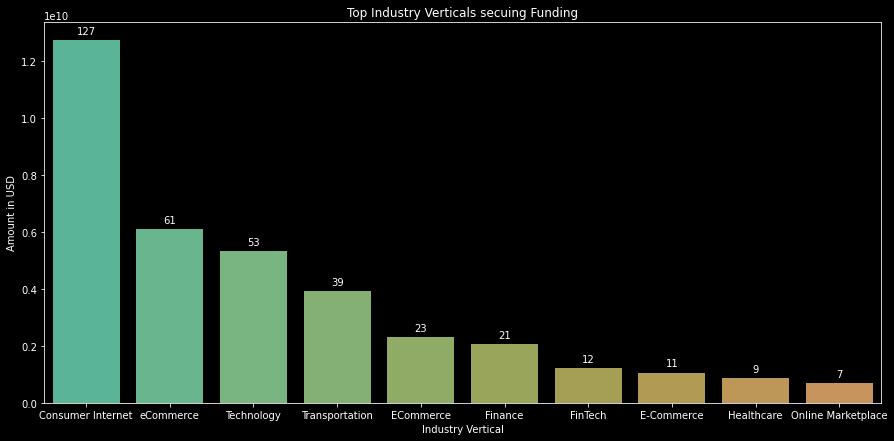

In [127]:
plt.figure(figsize=(15,7))
color2=['#4BC49E','#5CC28C','#6EBF7A','#7FBB69','#91B65B','#A1B14F','#B1AA48','#C0A345','#CD9C46','#D8944C']
sns.set_palette(sns.color_palette(color2))
g4=sns.barplot(data=Inv_verticals_Top_10,x='Industry Vertical',y='Amount in USD')
g4.set(title="Top Industry Verticals secuing Funding")

for a in g4.patches:
    g4.annotate('{:.0f}'.format((a.get_height()/100000000).round(2)),
                ((a.get_x()+a.get_width()/2),a.get_height()),
                ha="center",va="center",
                xytext=(0,9),
                textcoords= 'offset points'
               )

In [79]:
#Consumer Internet and eCommerce are the industries investors are most interested in

In [80]:
#How is the funding ecosystem evolving with time ?

In [81]:
data['YearMonth']=data['Year']*100+data['Month']

In [82]:
data.columns

Index(['Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD',
       'Year', 'Month', 'YearMonth'],
      dtype='object')

In [83]:
data_time=data[['Date dd/mm/yyyy','YearMonth','City  Location','Amount in USD']]
data_time=data_time.dropna(how="any",axis=0,subset=['City  Location'])

In [84]:
data_time=pd.DataFrame(data_time[['YearMonth','City  Location']].value_counts()).reset_index().sort_values(by=['City  Location','YearMonth'],ascending=True)

In [114]:
data_time=data_time[data_time['City  Location'].isin(['Bengaluru','Mumbai','New Delhi','Gurgaon','Noida'])]

In [115]:
data_time.columns=['YearMonth','City  Location','Count']

,YearMonth,City Location,Count
240,201501,Bengaluru,3
197,201502,Bengaluru,4
156,201503,Bengaluru,5
54,201504,Bengaluru,15
35,201505,Bengaluru,18
...,...,...,...
289,201806,Noida,2
432,201811,Noida,1
452,201901,Noida,1
509,201908,Noida,1


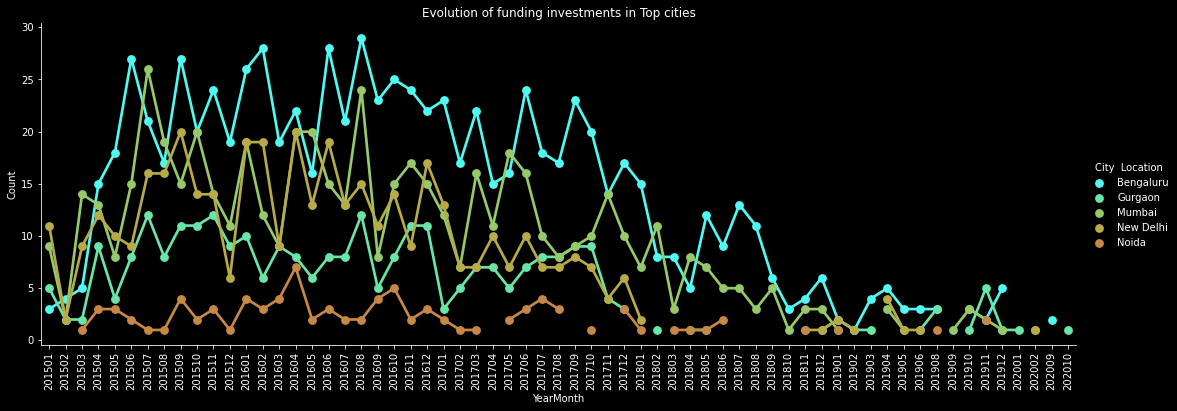

In [131]:
color3=['#50F9F1','#6AE5A8','#96C96A','#B7AA47','#C78845']
sns.set_palette(sns.color_palette(color3))
g5=sns.catplot(data=data_time,x='YearMonth',y='Count',hue='City  Location',kind="point",height=5, aspect=3.0)
g5.set(title='Evolution of funding investments in Top cities')
plt.xticks(rotation=90)
plt.show()